<a href="https://colab.research.google.com/github/nbintang/Dijkstra-Algorithm/blob/main/example_dijkstra_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [ ]:
graph = {
    "Jakarta": {"Depok": 15, "Cawang": 10},
    "Depok": {"Bogor": 30, "Cawang": 15},
    "Cawang": {"Bogor": 20, "Depok": 15},
    "Bogor": {},
}

In [ ]:
def Dijkstra(graph, start, target):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    path = []
    node = target
    while previous_nodes[node] is not None:
        path.append(node)
        node = previous_nodes[node]

    if path:
        path.append(start)
    path.reverse()

    return distances[target], path

In [ ]:
distance, path = Dijkstra(graph, 'Jakarta', 'Bogor')
print(f"jarak terpendek dari jakarta ke bogor: {distance} km")
print(f"rute terpendek dari jakarta ke bogor: {' -> '.join(path)}")

jarak terpendek dari jakarta ke bogor: 30 km
rute terpendek dari jakarta ke bogor: Jakarta -> Cawang -> Bogor


In [ ]:
G = nx.Graph()

for node in graph:
    for neighbor, weight in graph[node].items():
        G.add_edge(node, neighbor, weight=weight)
pos = nx.spring_layout(G)

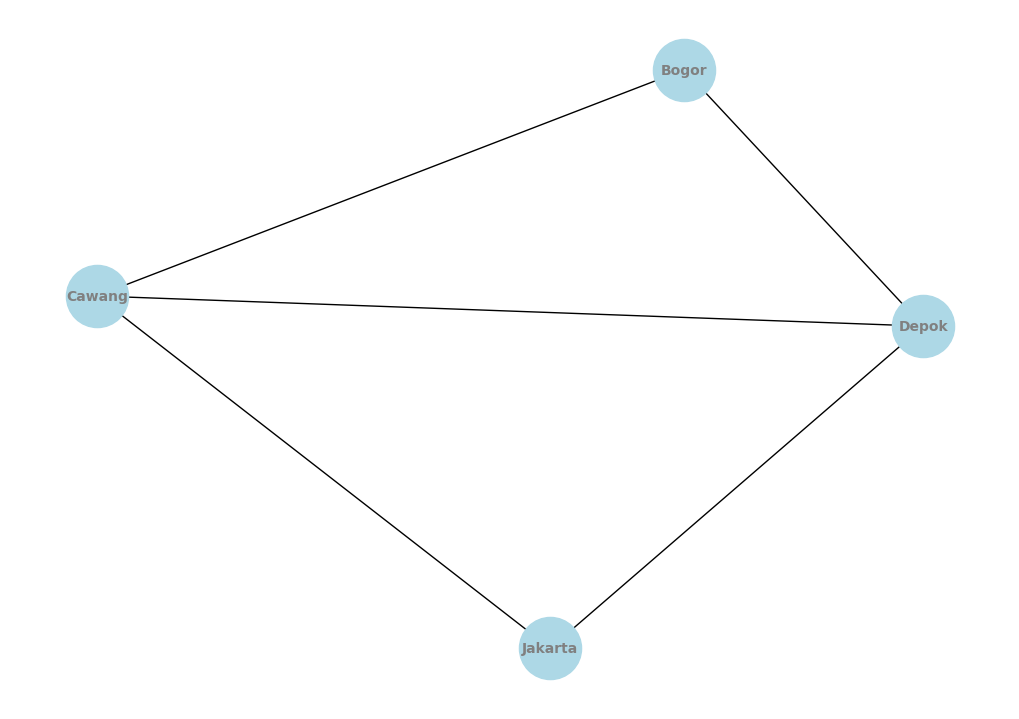

In [ ]:
plt.figure(figsize=(10, 7))
nx.draw(G,
        pos,
        with_labels=True,
        node_size=2000,
        node_color='lightblue',
        font_size=10,
        font_weight='bold',
        font_color='gray'
        )

{('Jakarta', 'Depok'): Text(0.1853596690543031, -0.48581186922528286, '15'),
 ('Jakarta', 'Cawang'): Text(-0.25701363087868934, -0.43766809990399713, '10'),
 ('Depok', 'Bogor'): Text(0.2570159343310269, 0.43766172268605996, '30'),
 ('Depok', 'Cawang'): Text(-0.0573673142978469, 0.07652080077283036, '15'),
 ('Cawang', 'Bogor'): Text(-0.1853596853524337, 0.4858132159579579, '20')}

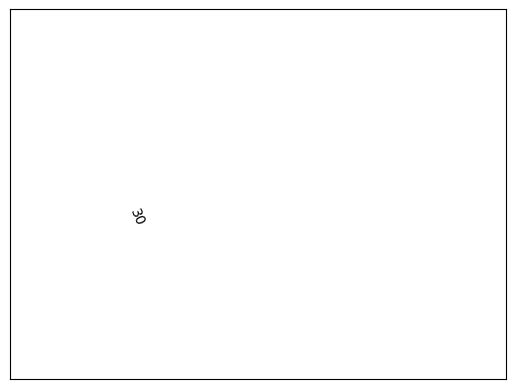

In [ ]:
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

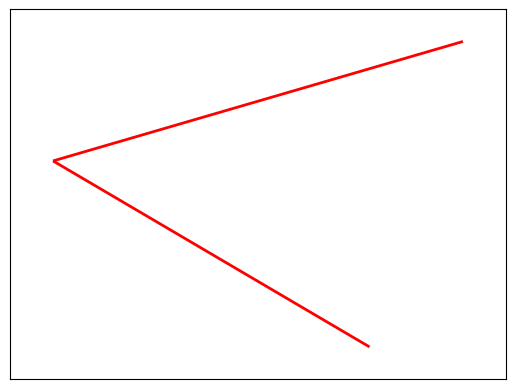

In [ ]:
# Sorot jalur terpendek
if path:
    edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)



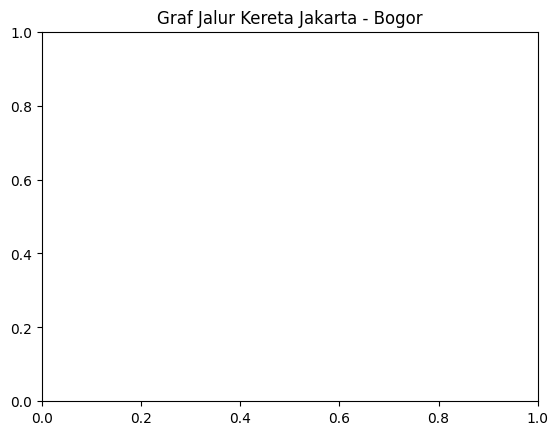

In [ ]:
# Tampilkan visualisasi
plt.title("Graf Jalur Kereta Jakarta - Bogor")
plt.show()